# Linear Regression from Scratch



In [4]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [5]:
# Read comma separated data
data = np.loadtxt(os.path.join('data.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples
print(m)

97


Plotting the Data

In [6]:
def plotData(x, y):
  
    fig = pyplot.figure()  # open a new figure

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')



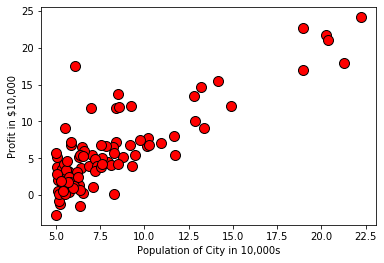

In [7]:
plotData(X, y)


Gradient Descent


In [8]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

Computing the cost $J(\theta)$


In [9]:
def computeCost(X, y, theta):

    
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    y_predict = np.dot(X,theta)
    sqrd_error = (y_predict-y)**2
    cost=sum(sqrd_error)
    J=(1/(2*m)*cost)
    #J=(np.sum(np.square(np.dot(X,theta)-y)))/(2*m)
    
    return J

In [10]:
# YOU CAN CHANGE THE VALUE OF A,B FOR DIFFERENT INITIALIZATIONS OF THETA
A = 0.0
B = 0.0
J = computeCost(X, y, theta=np.array([A, B]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)


With theta = [0, 0] 
Cost computed = 32.07


In [11]:
# YOU CAN CHANGE THE VALUE OF A,B FOR DIFFERENT INITIALIZATIONS OF THETA
A = -1
B = 2
J = computeCost(X, y, theta=np.array([A, B]))
print('With theta = [-1, 2] \nCost computed = %.2f' % J)


With theta = [-1, 2] 
Cost computed = 54.24


In [12]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    #
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        error = np.dot(X,theta)-y
        temp0 = theta[0]-((alpha/m) * np.sum(error))
        temp1 = theta[1]-((alpha/m) * np.sum(error*X[:,1]))
        theta = np.array([temp0,temp1])
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [13]:
# initialize fitting parameters
# FEEL FREE TO CHANGE ANY PARAMETER
A = 0.0
B = 0.0
theta = np.array([A,B]) 

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: -3.6303, 1.1664


In [14]:
theta

array([-3.63029144,  1.16636235])

<h5>We will use your final parameters to plot the linear fit. The results should look like the following figure.</h5>
<img src="https://i.ibb.co/FY8L2mn/graph-w3.png">

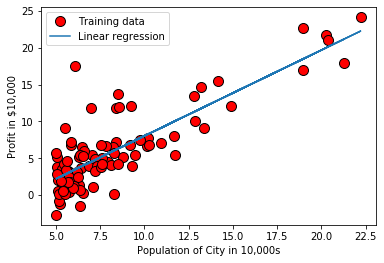

In [15]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

In [16]:
# Now you can predict values for various population sizes.
population_size = 35000
population_size = population_size/10000

predict1 = np.dot([1, population_size], theta)
print('For population = ' + str(population_size*10000))
print('we predict a profit of {:.2f}\n'.format(predict1*10000))



For population = 35000.0
we predict a profit of 4519.77

